# Experimento: Influência da Inicialização e Função de Ativação em uma Rede Neural
Este experimento investiga como diferentes **funções de ativação** e **estratégias de inicialização de pesos** influenciam o desempenho de uma rede neural simples usando o dataset Fashion MNIST.


## 1. Imports

Importamos as bibliotecas necessárias: TensorFlow para construção e treinamento do modelo, NumPy para manipulação de arrays e Matplotlib para visualização.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError


## 2. Carregamento e normalização dos dados

Carregamos o conjunto Fashion MNIST, composto por imagens 28x28 em tons de cinza. Os dados são normalizados para o intervalo [0, 1] e limitados a 10.000 amostras para reduzir o tempo de execução.


In [4]:
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0  # Normalizar

x_train = x_train[:10000]
y_train = y_train[:10000]


## 3. Codificação dos rótulos

Os rótulos são convertidos para o formato one-hot, necessário para treinamento com `softmax` e função de perda `MeanSquaredError`.


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)


## 4. Lista de funções de ativação e inicializações

Selecionamos três funções de ativação comuns (`sigmoid`, `tanh` e `relu`) e cinco esquemas diferentes de inicialização de pesos para testar sua influência.


In [6]:
activations = ['sigmoid', 'tanh', 'relu']

initializers = [
    GlorotUniform(seed=0),
    HeNormal(seed=1),
    RandomNormal(mean=0.0, stddev=0.05, seed=2),
    GlorotUniform(seed=3),
    HeNormal(seed=4)
]


## 5. Função de construção do modelo

Função que retorna uma rede neural com uma camada oculta de 64 neurônios. Permite variar a função de ativação e o inicializador de pesos.


In [7]:
def build_model(activation, initializer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=activation, kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])
    return model


## 6. Função de perda

Utilizamos o erro quadrático médio (MSE) para avaliar a performance durante o treinamento.


In [8]:
loss_fn = MeanSquaredError()


## 7. Treinamento e visualização

Para cada função de ativação, treinamos 5 modelos com diferentes inicializações. As curvas de perda são plotadas para análise visual.



🔍 Testando função de ativação: sigmoid
 Treinamento 1/5 com inicialização diferente...
 Treinamento 2/5 com inicialização diferente...
 Treinamento 3/5 com inicialização diferente...
 Treinamento 4/5 com inicialização diferente...
 Treinamento 5/5 com inicialização diferente...


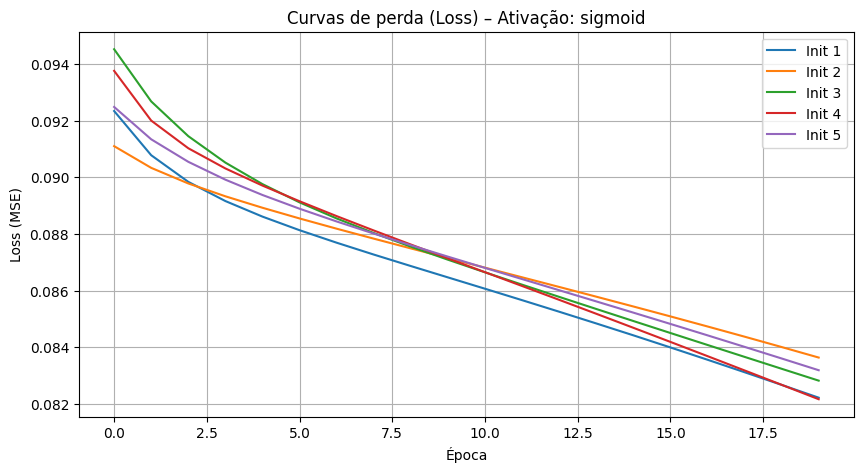


🔍 Testando função de ativação: tanh
 Treinamento 1/5 com inicialização diferente...
 Treinamento 2/5 com inicialização diferente...
 Treinamento 3/5 com inicialização diferente...
 Treinamento 4/5 com inicialização diferente...
 Treinamento 5/5 com inicialização diferente...


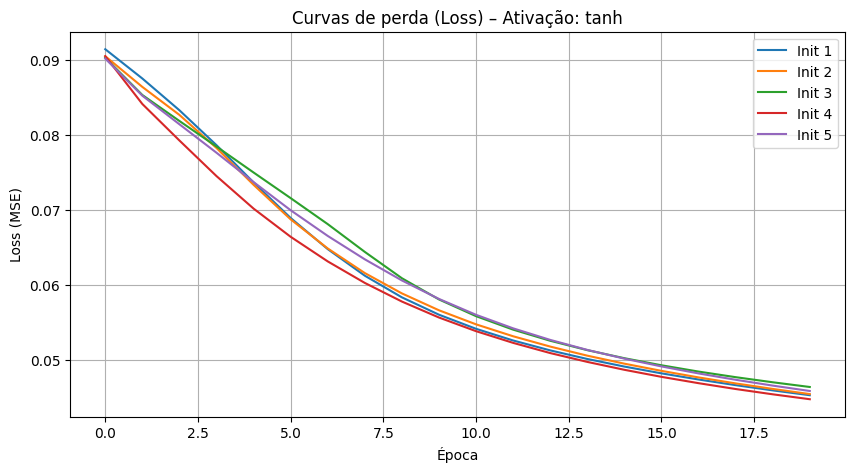


🔍 Testando função de ativação: relu
 Treinamento 1/5 com inicialização diferente...
 Treinamento 2/5 com inicialização diferente...
 Treinamento 3/5 com inicialização diferente...
 Treinamento 4/5 com inicialização diferente...
 Treinamento 5/5 com inicialização diferente...


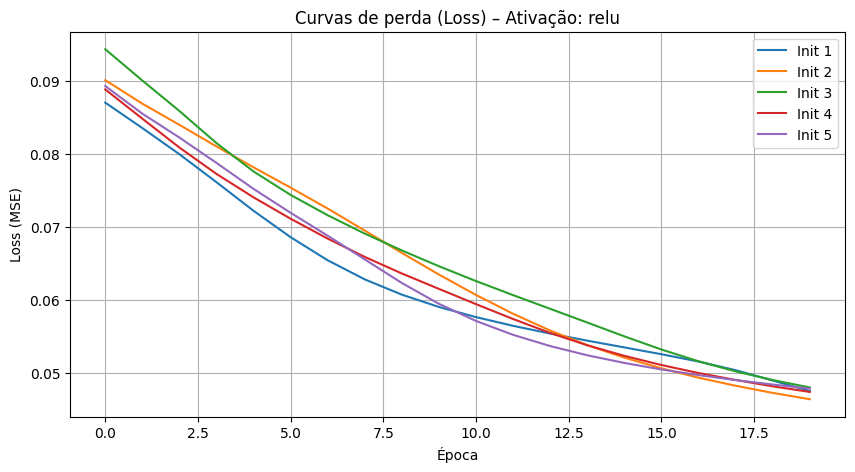

In [9]:
results = {}

for activation in activations:
    print(f"\n🔍 Testando função de ativação: {activation}")
    histories = []

    for i, init in enumerate(initializers):
        print(f" Treinamento {i+1}/5 com inicialização diferente...")
        model = build_model(activation, init)
        model.compile(optimizer=SGD(learning_rate=0.01),
                      loss=loss_fn,
                      metrics=['mse'])

        history = model.fit(x_train, y_train, epochs=20, verbose=0)
        histories.append(history.history['loss'])

    plt.figure(figsize=(10, 5))
    for i, loss_curve in enumerate(histories):
        plt.plot(loss_curve, label=f'Init {i+1}')
    plt.title(f'Curvas de perda (Loss) – Ativação: {activation}')
    plt.xlabel('Época')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    results[activation] = histories
